In [268]:
import timeit
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.model_selection import (KFold, train_test_split)
from matplotlib import cm
from sklearn.metrics import mean_squared_error as mse
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow_addons.metrics import RSquare
from sklearn.model_selection import RepeatedKFold, cross_val_score,KFold
from tensorflow.keras.models import * 
from tensorflow.keras.layers import * 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

## Importing and Spliting Data

In [355]:
# Import Data
url = 'https://raw.githubusercontent.com/pgardocki3/ME8813ML/master/Project%208813/superconductor.csv'
df = pd.read_csv(url)
y_og = y = df.iloc[:,-1]
# df=(df-df.mean())/df.std()

# Split data into train/test sets
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)


y.head()

0    29.0
1    26.0
2    19.0
3    22.0
4    23.0
Name: critical_temp, dtype: float64

### Pearson Correlation

                         mean_atomic_mass  wtd_mean_atomic_mass  \
mean_atomic_mass                 1.000000              0.815977   
wtd_mean_atomic_mass             0.815977              1.000000   
gmean_atomic_mass                0.940298              0.848242   
wtd_gmean_atomic_mass            0.745841              0.964085   
entropy_atomic_mass             -0.104000             -0.308046   
wtd_entropy_atomic_mass         -0.097609             -0.412666   
range_atomic_mass                0.125659             -0.144029   
wtd_range_atomic_mass            0.446225              0.716623   
std_atomic_mass                  0.196460             -0.060739   
wtd_std_atomic_mass              0.130675             -0.089471   

                         gmean_atomic_mass  wtd_gmean_atomic_mass  \
mean_atomic_mass                  0.940298               0.745841   
wtd_mean_atomic_mass              0.848242               0.964085   
gmean_atomic_mass                 1.000000             

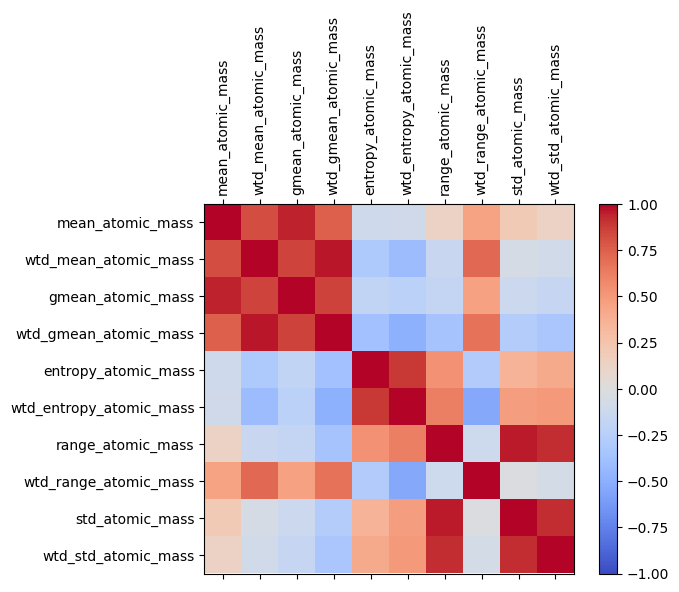

In [4]:
corr = X1.corr()
print(corr)
fig = plt.figure()
#plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(X1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X1.columns)
ax.set_yticklabels(X1.columns)
plt.show()

### PCA

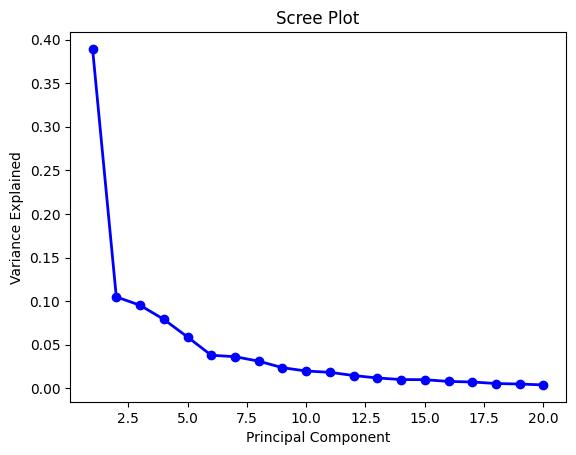

0.96937038387739


In [356]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scalar = StandardScaler()
scaled_df = X.copy()
scaled_df = pd.DataFrame(scalar.fit_transform(scaled_df),columns=scaled_df.columns)

# Perform PCA
pca = PCA(n_components=20)
pca.fit(scaled_df)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()
print(sum(pca.explained_variance_ratio_))

# ANN

## No PCA

In [271]:
%%time
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

# data = pca.transform(scaled_df)
# X_train_pca, X_test_pca = train_test_split(data, test_size=.25, random_state=1)
def build_regressor():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(81,)),
        tf.keras.layers.Dense(units=64, activation='relu', 
                              input_shape=input_shape),
        tf.keras.layers.Dense(units=64, activation='relu'),
#         tf.keras.layers.Dense(units=32, activation='relu'),
#         tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(units=1)])
    model.compile(optimizer='adam', loss='mse', metrics=[r_squared])
    return model
regressor = KerasRegressor(build_fn = build_regressor, epochs = 80)
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train,scoring='r2',cv = 10, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()
print(mean)

0.8913302732109294
CPU times: total: 78.1 ms
Wall time: 1min 52s


0.927839457988739
0.8913302732109294 0.01115114584946589
Test Accuracy: 0.891
167/167 [==============================] - 0s 602us/step


<Axes: >

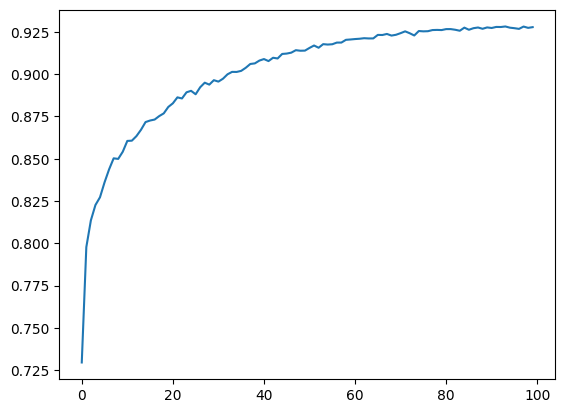

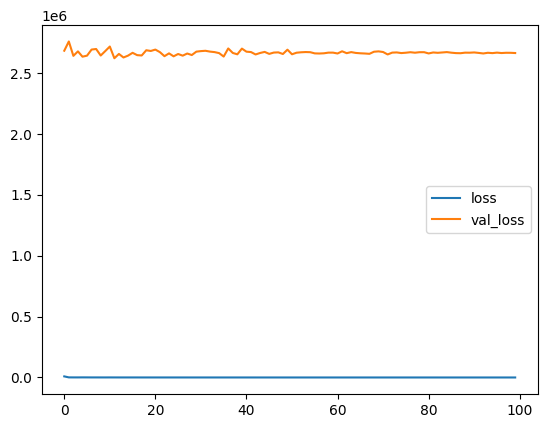

In [359]:
plt.plot(losses.history['r_squared'])
print(losses.history['r_squared'][-1])
# from tensorflow_addons.metrics.r_square import RSquare
# metric = RSquare()
# metric.update_state(y_test, y_pred)
# result = metric.result()
# result.numpy()
print(mean, variance)
model = build_regressor()
loss1, acc = model.evaluate(X_test, y_test, verbose=0)
losses = model.fit(X_train, y_train,
                   validation_data=(X_test,y_test),
                   epochs=100,
                   verbose=0,
                   callbacks=[LearningRateScheduler(lr_time_based_decay,verbose=0)]
                   )
print('Test Accuracy: %.3f' % mean)
y_pred = model.predict(X_test)

loss_df = pd.DataFrame(losses.history)
loss_df.loc[:,['loss','val_loss']].plot()



# Neural Networks

In [343]:
# Building a simple neural network
import keras
import tensorflow as tf
def build_model():
    model=keras.Sequential([
        keras.Input(shape=(81,)),
        keras.layers.Dense(64, activation='relu', input_shape=[81,]),
        keras.layers.Dense(64, activation='relu'),
#         keras.layers.Dense(96, activation='relu'),
#         keras.layers.Dense(70, activation='relu'),
        keras.layers.Dense(1)
    ])
    #No activation is used in the last layer as this is regression
    optimizer= tf.keras.optimizers.Adam(0.01)
    
    model.compile(loss='mse',
                 optimizer= optimizer,
                 metrics= ['mae', 'mse'])
    return model

In [344]:
model= build_model()
model.summary()

Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_411 (Dense)           (None, 64)                5248      
                                                                 
 dense_412 (Dense)           (None, 64)                4160      
                                                                 
 dense_413 (Dense)           (None, 1)                 65        
                                                                 
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


In [345]:
# Setting 'restore_best_weights' as True helps restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=40, verbose=1, mode='min', restore_best_weights=False)
from sklearn.model_selection import cross_val_score
def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)
# data = pca.transform(scaled_df)
# X_train_pca, X_test_pca = train_test_split(data, test_size=.25, random_state=1)
history= model.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_test, y_test),
    verbose=0, #set verbose=1 for full details at every epoch
    callbacks=[LearningRateScheduler(lr_time_based_decay,verbose=0)]
        )

loss, mae, mse= model.evaluate(X_test, y_test, verbose=2)
# kfold = KFold(n_splits=10, shuffle=True, random_state=123)
# score = cross_val_score(history, X_train, y_train,fit_params = 'mse')

print("Test-set Mean absolute error: {:5.2f}".format(mae)) # test mae- 36286
# print("Cross Val Score: {:5.2f}".format(score))

167/167 - 0s - loss: 0.1072 - mae: 0.2059 - mse: 0.1072 - 100ms/epoch - 601us/step
Test-set Mean absolute error:  0.21


Text(0.5, 1.0, 'Train - MAE')

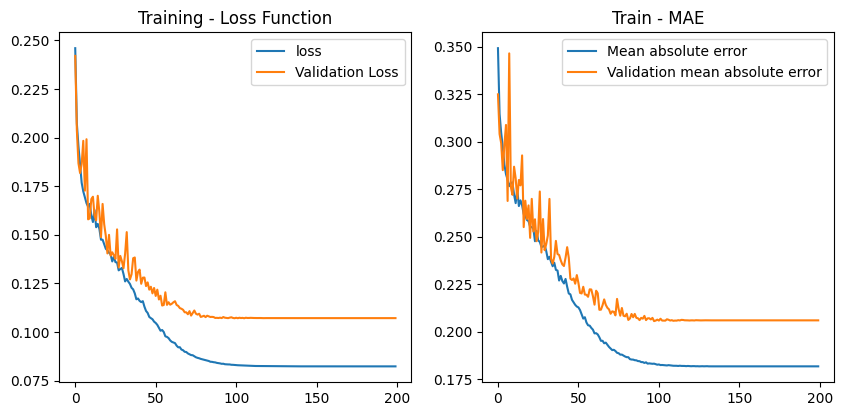

In [346]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['mae'], label='Mean absolute error')
plt.plot(history.history['val_mae'], label='Validation mean absolute error')
plt.legend()
plt.title('Train - MAE')

167/167 [==============================] - 0s 613us/step


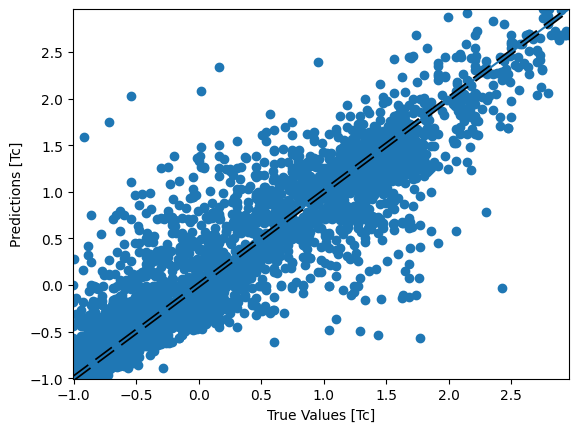

In [348]:
y_pred_test= model.predict(X_test).flatten()

# plt.axes(aspect='equal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.scatter(y_test, y_pred_test,)

plt.xlabel('True Values [Tc]')
plt.ylabel('Predictions [Tc]')

lims=[min(y_test), max(y_test)]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

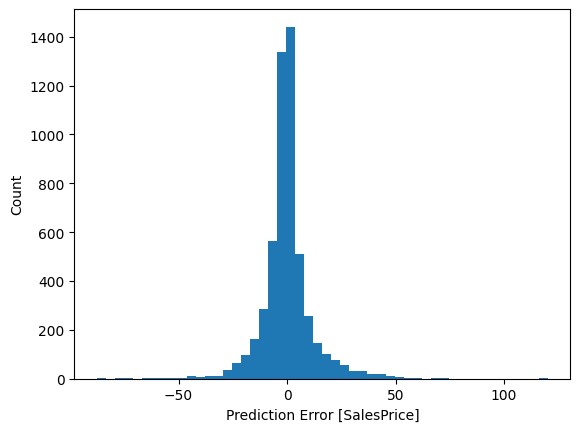

In [327]:
error= y_pred_test-y_test
plt.hist(error, bins=50)
plt.xlabel('Prediction Error [SalesPrice]')
_=plt.ylabel('Count')

In [349]:
# Accuracy metrics :
from sklearn.metrics import r2_score, mean_squared_error
y_pred_train= model.predict(X_train).flatten()
y_test = y_test*y_og.std() + y_og.mean()
y_pred_test = y_pred_test*y_og.std() + y_og.mean()
print("Accuracy obtained using x_train and x_val sets from the original x!")

print("Training accuracy: ",r2_score(y_train, y_pred_train))

print("Test accuracy: ",r2_score(y_test, y_pred_test))

print("Test mean-squared error: ",np.sqrt(mean_squared_error(y_test, y_pred_test, squared=False)))

score = mean_squared_error(y_test, y_pred_test)
print('RMSE: %.3f' % score**(.5))
#Hence the current test accuracy is 0.48385 and Test MSE is 59703.04
# Note- adding a droput layer decreases the accuracy to 0.46

499/499 [==============================] - 0s 544us/step
Accuracy obtained using x_train and x_val sets from the original x!
Training accuracy:  0.9181891058544139
Test accuracy:  0.8905852407402217
Test mean-squared error:  3.348749288016952
RMSE: 11.214


## XGBoost

[0]	validation_0-rmse:35.76612	validation_1-rmse:35.32809
[1]	validation_0-rmse:27.45950	validation_1-rmse:27.18382
[2]	validation_0-rmse:21.97666	validation_1-rmse:21.93041
[3]	validation_0-rmse:18.59293	validation_1-rmse:18.79282
[4]	validation_0-rmse:16.44208	validation_1-rmse:16.90015
[5]	validation_0-rmse:14.99773	validation_1-rmse:15.67726
[6]	validation_0-rmse:14.14934	validation_1-rmse:14.97815
[7]	validation_0-rmse:13.49762	validation_1-rmse:14.49333
[8]	validation_0-rmse:13.13616	validation_1-rmse:14.22960
[9]	validation_0-rmse:12.85298	validation_1-rmse:14.06115
[10]	validation_0-rmse:12.46376	validation_1-rmse:13.78055
[11]	validation_0-rmse:12.23313	validation_1-rmse:13.67791
[12]	validation_0-rmse:12.14210	validation_1-rmse:13.65044
[13]	validation_0-rmse:11.93593	validation_1-rmse:13.52778
[14]	validation_0-rmse:11.82195	validation_1-rmse:13.47671
[15]	validation_0-rmse:11.64144	validation_1-rmse:13.41072
[16]	validation_0-rmse:11.42591	validation_1-rmse:13.28479
[17]	va

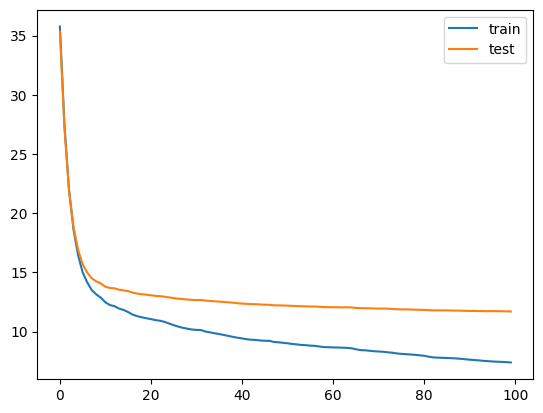

CPU times: total: 7.25 s
Wall time: 7.19 s


In [357]:
%%time
import xgboost as xgb
from sklearn.metrics import accuracy_score
# define the model
model = xgb.XGBRegressor()


# define the datasets to evaluate each iteration
evalset = [(X_train_pca, y_train), (X_test_pca,y_test)]

# fit the model
model.fit(X_train_pca, y_train, eval_set=evalset)

# evaluate performance
yhat = model.predict(X_test_pca)
score = mean_squared_error(y_test, yhat)
print('RMSE: %.3f' % score**(.5))

results = model.evals_result()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_test_pca, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )
# plot learning curves
plt.plot(results['validation_0']['rmse'], label='train')
plt.plot(results['validation_1']['rmse'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

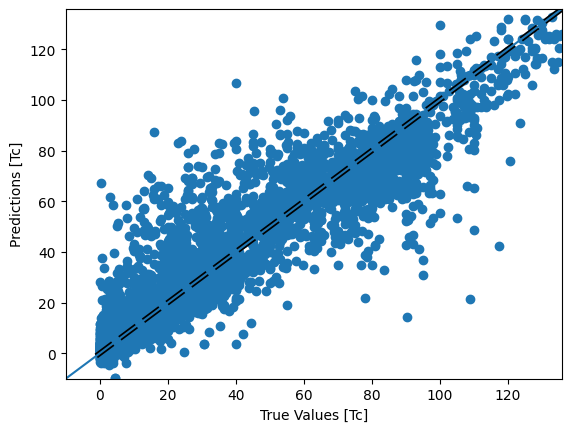

In [336]:
y_pred_test= model.predict(X_test_pca).flatten()

# plt.axes(aspect='equal')
plt.plot([y.min(), 140], [y.min(), 140], 'k--', lw=4)
df=(df-df.mean())/df.std()

# y_test = y_test*y_og.std() + y_og.mean()
y_pred_test = y_pred_test*y_og.std() + y_og.mean()
plt.scatter(y_test, y_pred_test,)

plt.xlabel('True Values [Tc]')
plt.ylabel('Predictions [Tc]')

lims=[min(y_test)-10, max(y_test)]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)



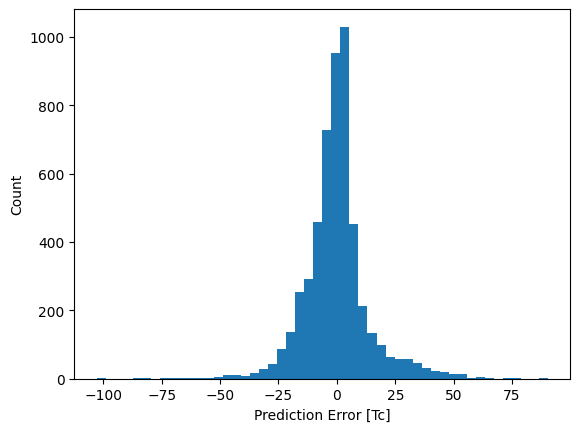

In [297]:
error= y_pred_test-y_test
plt.hist(error, bins=50)
plt.xlabel('Prediction Error [Tc]')
_=plt.ylabel('Count')

In [358]:
y_pred_train= model.predict(X_train_pca).flatten()

print("Accuracy obtained using x_train and x_val sets from the original x!")

print("Training accuracy: ",r2_score(y_train, y_pred_train))

print("Test accuracy: ",r2_score(y_test, yhat))
y_test = y_test*y_og.std() + y_og.mean()
yhat = yhat*y_og.std() + y_og.mean()
print("Test mean-squared error: ",np.sqrt(mean_squared_error(y_test, yhat, squared=False)))


ms = np.sqrt(np.average((y_test-y_pred_test)**2))
print(ms)

Accuracy obtained using x_train and x_val sets from the original x!
Training accuracy:  0.9538122464226386
Test accuracy:  0.8810620512970411
Test mean-squared error:  20.01251698983593
1629.715036417068
